<a href="https://colab.research.google.com/github/Vigneshthanga/SpecialTopics/blob/master/Assignment-2/GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import tensorflow 

In [11]:
import tensorflow as tf

## Input and Output dimension

In [12]:
input_dim = 2
output_dim = 1
learning_rate = 0.01

## Random Weight Tensor

In [13]:
weights = tf.random.uniform(shape=(input_dim, output_dim))
w = tf.Variable(weights)

## Random Bias Tensor

In [14]:
bias = tf.random.uniform(shape=(output_dim,))
b = tf.Variable(bias)

## Function definition to get Predictions

In [15]:
def getPredictions(x):
  ret = tf.matmul(x, w) + b
  return ret

## Function definition to get Loss

In [16]:
def getLoss(actual, y):
  return tf.reduce_mean(tf.square(actual-y))

## Function to train

In [17]:
def train(x, actual):
  with tf.GradientTape() as tape:
    pred = getPredictions(x)
    loss = getLoss(actual, pred)
    dloss_dw, dloss_db = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

## Function annotated with tf.function. This is used for optimization

In [18]:
@tf.function
def train_with_optimization(x, actual):
  with tf.GradientTape() as tape:
    pred = getPredictions(x)
    #print(pred)
    loss = getLoss(actual, pred)
    dloss_dw, dloss_db = tape.gradient(loss, [w,b])
  w.assign_sub(learning_rate * dloss_dw)
  b.assign_sub(learning_rate * dloss_db)
  return loss

## Visualizing the data in scatter plot

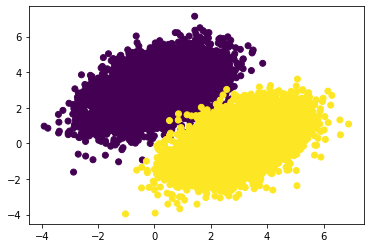

In [19]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

n = 10000
neg_samples = np.random.multivariate_normal(mean = [0,3], cov = [[1,0.5], [0.5,1]], size=n)
pos_samples = np.random.multivariate_normal(mean = [3,0], cov=[[1,0.5], [0.5,1]], size=n)
features = np.vstack((neg_samples, pos_samples)).astype(np.float32)
labels = np.vstack((np.zeros((n, 1), dtype='float32'),np.ones((n, 1), dtype='float32')))
plt.scatter(features[:, 0], features[:, 1], c=labels[:,0])

## Profiling using time library

In [20]:
import time

## Model Training without optmization

In [21]:
indices = np.random.permutation(len(features))
features = features[indices]
labels = labels[indices]
print(labels.shape)
dataset = tf.data.Dataset.from_tensor_slices((features, labels))
dataset = dataset.shuffle(buffer_size=1024).batch(256)

t0 = time.time()
for epoch in range(10):
  for step, (x,y) in enumerate(dataset):
    loss = train(x,y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
t1 = time.time()

print('time to run is %.3f sec' % (t1-t0))

(20000, 1)
Epoch 0: last batch loss = 0.0200
Epoch 1: last batch loss = 0.0534
Epoch 2: last batch loss = 0.0313
Epoch 3: last batch loss = 0.0227
Epoch 4: last batch loss = 0.0137
Epoch 5: last batch loss = 0.0222
Epoch 6: last batch loss = 0.0323
Epoch 7: last batch loss = 0.0295
Epoch 8: last batch loss = 0.0250
Epoch 9: last batch loss = 0.0248
time to run is 1.708 sec


## Model Training with optmization

In [22]:
t0 = time.time()
for epoch in range(10):
  for step, (x,y) in enumerate(dataset):
    loss = train_with_optimization(x,y)
  print('Epoch %d: last batch loss = %.4f' % (epoch, float(loss)))
t1 = time.time()

print('time to run is %.3f sec' % (t1-t0))

Epoch 0: last batch loss = 0.0140
Epoch 1: last batch loss = 0.0354
Epoch 2: last batch loss = 0.0159
Epoch 3: last batch loss = 0.0339
Epoch 4: last batch loss = 0.0200
Epoch 5: last batch loss = 0.0167
Epoch 6: last batch loss = 0.0166
Epoch 7: last batch loss = 0.0254
Epoch 8: last batch loss = 0.0187
Epoch 9: last batch loss = 0.0224
time to run is 1.008 sec
